In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Analysing Data

In [14]:
df=pd.read_csv("data.csv.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,862028,M,15.060,19.83,100.30,705.6,0.10390,0.15530,0.170000,0.088150,...,18.23,24.23,123.50,1025.0,0.1551,0.42030,0.52030,0.21150,0.2834,0.08234
95,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988


In [15]:
df.shape

(99, 32)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       99 non-null     int64  
 1   diagnosis                99 non-null     object 
 2   radius_mean              99 non-null     float64
 3   texture_mean             99 non-null     float64
 4   perimeter_mean           99 non-null     float64
 5   area_mean                99 non-null     float64
 6   smoothness_mean          99 non-null     float64
 7   compactness_mean         99 non-null     float64
 8   concavity_mean           99 non-null     float64
 9   concave points_mean      99 non-null     float64
 10  symmetry_mean            99 non-null     float64
 11  fractal_dimension_mean   99 non-null     float64
 12  radius_se                99 non-null     float64
 13  texture_se               99 non-null     float64
 14  perimeter_se             99 

In [17]:
dummy_df=pd.get_dummies(df)
dummy_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,False,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,False,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,False,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,False,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,False,True


In [18]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [19]:
#This Dataset has no missing values

# Apply Dummies

In [20]:
dummy_df=pd.get_dummies(df['diagnosis'])
dummy_df

,B,M
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
94,False,True
95,False,True
96,True,False
97,True,False


In [21]:
dummy_df=pd.get_dummies(df['diagnosis'], drop_first=True) 
dummy_df

,M
0,True
1,True
2,True
3,True
4,True
...,...
94,True
95,True
96,False
97,False


In [22]:
merged = pd.concat([df,dummy_df],axis=1)
merged

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,True
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,True
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,True
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,True
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,862028,M,15.060,19.83,100.30,705.6,0.10390,0.15530,0.170000,0.088150,...,24.23,123.50,1025.0,0.1551,0.42030,0.52030,0.21150,0.2834,0.08234,True
95,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,True
96,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,False
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,False


In [23]:
final = merged.drop(['M'], axis=1)

final

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,862028,M,15.060,19.83,100.30,705.6,0.10390,0.15530,0.170000,0.088150,...,18.23,24.23,123.50,1025.0,0.1551,0.42030,0.52030,0.21150,0.2834,0.08234
95,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988


In [24]:
final['diagnosis'] = final[['fractal_dimension_worst']].copy()

final

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0.11890,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,0.08902,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,0.08758,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,0.17300,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,0.07678,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,862028,0.08234,15.060,19.83,100.30,705.6,0.10390,0.15530,0.170000,0.088150,...,18.23,24.23,123.50,1025.0,0.1551,0.42030,0.52030,0.21150,0.2834,0.08234
95,86208,0.08368,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,86211,0.07376,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,862261,0.08988,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988


In [25]:
final.drop("fractal_dimension_worst", axis = 1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,842302,0.11890,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601
1,842517,0.08902,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750
2,84300903,0.08758,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613
3,84348301,0.17300,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638
4,84358402,0.07678,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,862028,0.08234,15.060,19.83,100.30,705.6,0.10390,0.15530,0.170000,0.088150,...,0.003520,18.23,24.23,123.50,1025.0,0.1551,0.42030,0.52030,0.21150,0.2834
95,86208,0.08368,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,0.004411,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689
96,86211,0.07376,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,0.003408,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227
97,862261,0.08988,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,0.005667,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934


In [26]:
print("Original Database...................................")
df.head()

Original Database...................................


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
print("After updating the 'final' with 'df'.............................")
df.update(final)
df

After updating the 'final' with 'df'.............................


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0.1189,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,0.08902,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,0.08758,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,0.173,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,0.07678,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,862028,0.08234,15.060,19.83,100.30,705.6,0.10390,0.15530,0.170000,0.088150,...,18.23,24.23,123.50,1025.0,0.1551,0.42030,0.52030,0.21150,0.2834,0.08234
95,86208,0.08368,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,86211,0.07376,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,862261,0.08988,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988


# Feature Scaling

In [28]:
x = df.drop('radius_mean', axis=1)
y = df['radius_mean']
print('Shape of x = ', x.shape)
print('Shape of y = ', y.shape)

Shape of x =  (99, 31)
Shape of y =  (99,)


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2020)
#test_size=0.2 it means we use 20% of dataset for test
print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (79, 31)
Shape of y_train =  (79,)
Shape of X_test =  (20, 31)
Shape of y_test =  (20,)


# Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)


#  Regression Algorithm

Train Support Vector Regression Model

In [31]:
from sklearn.svm import SVR


In [32]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train,y_train)
svr_rbf.score(x_test,y_test)


0.6827784297385482

SVR with Kernel Linear

In [33]:
svr_linear= SVR(kernel='linear', degree=2,)
svr_linear.fit(x_train, y_train)
svr_linear.score(x_test, y_test)

0.9974618335039044

In [34]:
x_test[0,:]

array([-0.52322947,  1.00880305, -0.20489323, -0.47015378, -0.53916973,
        1.03821652, -0.08136693,  0.08106991,  0.22046956,  0.74789985,
        0.3650953 , -0.74537322, -0.54527205, -0.77146193, -0.67356161,
       -0.24169477, -0.312453  , -0.22746875, -0.13010447, -0.37970192,
       -0.18902348, -0.39967856,  0.2698445 , -0.42172358, -0.46399095,
        1.60575045,  0.35049367,  0.63690476,  0.93652322,  0.82792129,
        1.00880305])

In [35]:
svr_linear.predict([x_test[0]])

array([13.17768163])

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
y_pred=lr.predict(x_test)

In [39]:
y_test

47    13.170
12    19.170
61     8.598
23    21.160
70    18.940
68     9.029
43    13.280
35    16.740
60    10.170
87    19.020
40    13.440
57    14.710
49    13.490
58    13.050
7     13.710
88    12.360
25    17.140
37    13.030
64    12.680
45    18.650
Name: radius_mean, dtype: float64

In [40]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.07190521706055027


In [41]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.00967311378595813


In [42]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.09835198923233902


In [43]:
print("r_squared",r2_score(y_test,y_pred))

r_squared 0.99918418204488


# KNeighborsRegressor Algorithm

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [47]:
sc.fit(x_train)

StandardScaler()

In [48]:
regressor.score(x_test,y_test)

0.7824295445982972

<Axes: xlabel='diagnosis', ylabel='count'>

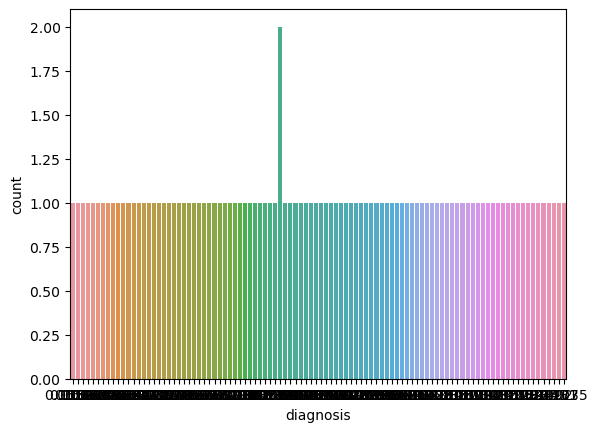

In [49]:
sns.countplot(x='diagnosis',data=df, width=0.8)

In [50]:
#we have take 4 numberic variable
#we have take survived as a target variablr & rest 3 areindependent
df2=df[['radius_mean','texture_mean','perimeter_mean','area_mean']]
df2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean
0,17.99,10.38,122.80,1001.0
1,20.57,17.77,132.90,1326.0
2,19.69,21.25,130.00,1203.0
3,11.42,20.38,77.58,386.1
4,20.29,14.34,135.10,1297.0


In [51]:
df2.isna().sum()

radius_mean       0
texture_mean      0
perimeter_mean    0
area_mean         0
dtype: int64

In [52]:
#convert data in matrix and vector form
#bez independent variable in matrix form
#dependend variable in vector form

In [53]:
x=df2.drop("radius_mean",axis=1)
#to show the matri we defined x(capital)
#we drop survived because it is dependent variable
y=df2["radius_mean"]
#y is used to show vector
print('Shape of X =', x.shape)
print('Shape of Y =', y.shape)

Shape of X = (99, 3)
Shape of Y = (99,)


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)
#test size=0.2 itr means we use 20% of dataset for test
print('Shape of x_train=',x_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of x_test=',x_test.shape)
print('Shape of y_test=',y_test.shape)

Shape of x_train= (79, 3)
Shape of y_train= (79,)
Shape of x_test= (20, 3)
Shape of y_test= (20,)


In [56]:
#standard scaler remove the mean and scale each feature/variable
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

In [57]:
#attributes
#standard scaler.mean
#the mean value for each feature in the traning set.equal
sc.mean_

array([ 20.16025316,  95.66455696, 690.71265823])

In [58]:
#attributr
#scale
sc.scale_

array([  3.55145147,  21.0245685 , 289.1659934 ])

In [59]:
x_train.describe()
#different feature numerical distribution

,texture_mean,perimeter_mean,area_mean
count,79.000000,79.000000,79.000000
mean,20.160253,95.664557,690.712658
std,3.574145,21.158912,291.013718
min,11.790000,54.340000,221.800000
25%,17.860000,80.575000,471.000000
50%,20.830000,94.570000,645.700000
75%,22.455000,111.450000,901.950000
max,27.540000,137.200000,1404.000000


In [60]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [61]:
x_train_sc

array([[ 1.06428227,  0.08254357, -0.07750793],
       [ 1.30643678,  1.74726264,  1.4949453 ],
       [ 1.07554527,  0.81501996,  0.72134119],
       [-1.21084385, -0.43637314, -0.59036215],
       [ 0.23926748, -1.69109568, -1.45699241],
       [ 0.6897875 , -0.09819735, -0.38874785],
       [ 0.22800448, -1.03947707, -1.00016138],
       [ 1.08680827, -0.05206085, -0.09687397],
       [ 2.07795233,  0.0506761 , -0.11036103],
       [-0.06201779, -1.59596888, -1.37019106],
       [ 0.56026299,  0.03593144, -0.15566373],
       [-0.52380081, -0.43114117, -0.46897858],
       [ 1.09243977, -0.55623291, -0.74286971],
       [-0.09299104,  0.22047744,  0.05148372],
       [ 0.38568649,  0.08301921, -0.15877613],
       [ 0.36597623, -0.06728114, -0.14701818],
       [-1.2530801 , -0.47727767, -0.59036215],
       [-1.43891961,  0.91965945,  0.91430994],
       [-0.41117081, -0.84351586, -0.86494492],
       [ 0.32373998,  1.3287047 ,  1.51915285],
       [-0.46185431,  1.2097962 ,  1.328

In [62]:
x_train_sc=pd.DataFrame(x_train_sc,columns=['texture_mean','perimeter_mean','area_mean'])
x_test_sc=pd.DataFrame(x_test_sc,columns=['texture_mean','perimeter_mean','area_mean'])

In [63]:
x_train

,texture_mean,perimeter_mean,area_mean
65,23.94,97.40,668.3
12,24.80,132.40,1123.0
32,23.98,112.80,899.3
81,15.86,86.49,520.0
66,21.01,60.11,269.4
...,...,...,...
16,20.13,94.74,684.5
69,16.49,81.37,502.5
73,15.79,90.43,584.1
96,17.84,77.79,451.1


In [64]:
x_train_sc.head()

,texture_mean,perimeter_mean,area_mean
0,1.064282,0.082544,-0.077508
1,1.306437,1.747263,1.494945
2,1.075545,0.815020,0.721341
3,-1.210844,-0.436373,-0.590362
4,0.239267,-1.691096,-1.456992


In [65]:
x_train_sc.describe()

,texture_mean,perimeter_mean,area_mean
count,7.900000e+01,7.900000e+01,7.900000e+01
mean,7.434278e-16,7.030022e-17,3.051357e-16
std,1.006390e+00,1.006390e+00,1.006390e+00
min,-2.356854e+00,-1.965537e+00,-1.621604e+00
25%,-6.476938e-01,-7.177107e-01,-7.598150e-01
50%,1.885840e-01,-5.206085e-02,-1.556637e-01
75%,6.461434e-01,7.508094e-01,7.305055e-01
max,2.077952e+00,1.975567e+00,2.466705e+00


In [66]:
#observe the output mean value in two decimal format

In [67]:
x_train_sc.describe().round(2)
#after round(2) check mean value is 0 and std derivation is 1

,texture_mean,perimeter_mean,area_mean
count,79.00,79.00,79.00
mean,0.00,0.00,0.00
std,1.01,1.01,1.01
min,-2.36,-1.97,-1.62
25%,-0.65,-0.72,-0.76
50%,0.19,-0.05,-0.16
75%,0.65,0.75,0.73
max,2.08,1.98,2.47


# MinMaxScaler()

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
mmc=MinMaxScaler()
mmc.fit(x_train)

MinMaxScaler()

In [70]:
x_train_mmc=mmc.transform(x_train)
x_test_mmc=mmc.transform(x_test)


In [71]:
x_train_mmc

array([[0.77142857, 0.51967174, 0.37768567],
       [0.82603175, 0.94207096, 0.76230756],
       [0.77396825, 0.7055274 , 0.57308408],
       [0.2584127 , 0.38800386, 0.25224158],
       [0.58539683, 0.06963553, 0.04026391],
       [0.68698413, 0.47381125, 0.30155642],
       [0.58285714, 0.23497466, 0.15200474],
       [0.77650794, 0.48551774, 0.37294874],
       [1.        , 0.51158581, 0.36964981],
       [0.51746032, 0.09377263, 0.06149552],
       [0.65777778, 0.50784456, 0.35856877],
       [0.41333333, 0.3893314 , 0.28193199],
       [0.77777778, 0.35759112, 0.21493825],
       [0.51047619, 0.55467053, 0.40923702],
       [0.6184127 , 0.51979242, 0.35780748],
       [0.61396825, 0.4816558 , 0.36068347],
       [0.24888889, 0.37762491, 0.25224158],
       [0.20698413, 0.7320782 , 0.62028422],
       [0.43873016, 0.28469708, 0.18507867],
       [0.60444444, 0.83586773, 0.76822873],
       [0.42730159, 0.80569636, 0.7217053 ],
       [0.62285714, 0.24595704, 0.17433598],
       [0.

In [72]:
x_train_mmc=pd.DataFrame(x_train_mmc,columns=['texture_mean','perimeter_mean','area_mean'])
x_test_mmc=pd.DataFrame(x_test_mmc,columns=['texture_mean','perimeter_mean','area_mean'])

In [73]:
x_train_mmc.describe().round(2)

,texture_mean,perimeter_mean,area_mean
count,79.00,79.00,79.00
mean,0.53,0.50,0.40
std,0.23,0.26,0.25
min,0.00,0.00,0.00
25%,0.39,0.32,0.21
50%,0.57,0.49,0.36
75%,0.68,0.69,0.58
max,1.00,1.00,1.00


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


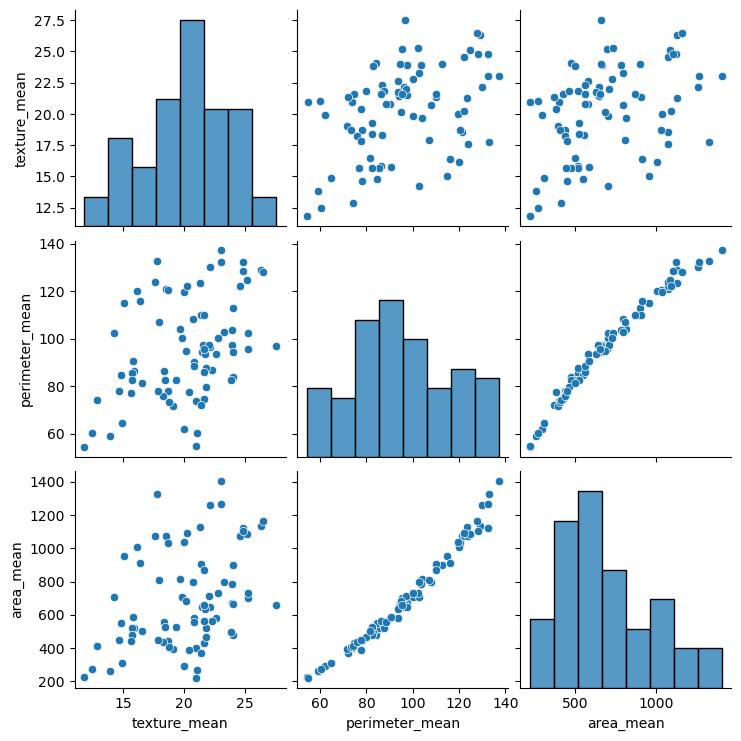

In [74]:
sns.pairplot(x_train)

# Ridge and Lasso linear regression

In [75]:
from sklearn.linear_model import Ridge, Lasso

In [76]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_test,y_test)

0.990698899736597

In [77]:
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.9793760990926873

In [78]:
rd2=Ridge(alpha=2)
rd2.fit(x_train,y_train)
rd2.score(x_test,y_test)

0.9906934018167369

In [79]:
ls2=Lasso(alpha=2)
ls2.fit(x_train,y_train)
ls2.score(x_test,y_test)

0.9762865522655845

In [80]:
ls3=Lasso(alpha=3)
ls3.fit(x_train,y_train)
ls3.score(x_test,y_test)

0.9764042909955867

# k-fold load digits

In [81]:
from sklearn.datasets import  data
data = data

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
